<a href="https://colab.research.google.com/github/tzou2024/PInTxEdgi/blob/main/PInT_Copy_of_Nationwide_enforcement_disparities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-Cross-Program
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project.
These two github repositories hold Python code that the notebook uses.
* ECHO_modules holds code that can be used in this and other notebooks

In [4]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git
!pip install geopandas
!pip install rtree
print("Done!")

fatal: destination path 'ECHO_modules' already exists and is not an empty directory.


  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Shapely-1.7.1-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\tzou\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tzou\\AppData\\Local\\Temp\\pip-install-90e7ph9q\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\tzou\\AppData\\Local\\Temp\\pip-install-90e7ph9q\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\tzou\AppData\Local\Temp\pip-pip-egg-info-zeihg_no'
         cwd: C:\Users\tzou\AppData\Local\Temp\pip-install-90e7ph9q\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


Done!


### 2.  Run a few Python modules.
These will help us process and visualize the different program data sets later.

In [5]:
from ECHO_modules.get_data import get_echo_data

import pandas as pd
import math
import geopandas
import rtree
print("Done!")

ModuleNotFoundError: No module named 'geopandas'

In [2]:
sql = 'select  "REGISTRY_ID","FAC_DERIVED_CB2010","FAC_PERCENT_MINORITY","NPDES_IDS","CWA_INSPECTION_COUNT","CWA_DAYS_LAST_INSPECTION","CWA_INFORMAL_COUNT","CWA_FORMAL_ACTION_COUNT","CWA_PENALTIES","CWA_LAST_PENALTY_AMT","CWA_QTRS_WITH_NC", "FAC_LONG", "FAC_LAT", "FAC_STATE","FAC_ZIP" from "ECHO_EXPORTER" where "NPDES_FLAG" = \'Y\''
#added zip codes
try:
# Don't index.
  full_echo_data = get_echo_data( sql )
except EmptyDataError:
  print("\nThere are no records.\n")
full_echo_data

NameError: name 'EmptyDataError' is not defined

### 3.  This cell gets Clean Water Act data from the SBU database.

In [ ]:
facs = None

sql = 'select  "REGISTRY_ID","FAC_DERIVED_CB2010","FAC_PERCENT_MINORITY","NPDES_IDS","CWA_INSPECTION_COUNT","CWA_DAYS_LAST_INSPECTION","CWA_INFORMAL_COUNT","CWA_FORMAL_ACTION_COUNT","CWA_PENALTIES","CWA_LAST_PENALTY_AMT","CWA_QTRS_WITH_NC", "FAC_LONG", "FAC_LAT", "FAC_STATE" from "ECHO_EXPORTER" where "NPDES_FLAG" = \'Y\''
#sql = 'select "REGISTRY_ID","FAC_DERIVED_CB2010","FAC_PERCENT_MINORITY","RCRA_IDS","RCRA_INSPECTION_COUNT","RCRA_DAYS_LAST_EVALUATION","RCRA_INFORMAL_COUNT","RCRA_FORMAL_ACTION_COUNT","RCRA_PENALTIES","RCRA_LAST_PENALTY_AMT","RCRA_QTRS_WITH_NC" from "ECHO_EXPORTER" where "RCRA_FLAG" = \'Y\''
#sql = 'select "REGISTRY_ID","FAC_DERIVED_CB2010","FAC_PERCENT_MINORITY","AIR_IDS","CAA_EVALUATION_COUNT","CAA_DAYS_LAST_EVALUATION","CAA_INFORMAL_COUNT","CAA_FORMAL_ACTION_COUNT","CAA_PENALTIES","CAA_LAST_PENALTY_AMT","CAA_QTRS_WITH_NC" from "ECHO_EXPORTER" where "AIR_FLAG" = \'Y\''
print(sql)
try:
    # Don't index.
    facs = get_echo_data( sql )
except pd.errors.EmptyDataError:
    print("\nThere are no results for this query.\n")

facs # Note: there are not a small number of facilities (registry IDs) without CB and Percent Minority information

select  "REGISTRY_ID","FAC_DERIVED_CB2010","FAC_PERCENT_MINORITY","NPDES_IDS","CWA_INSPECTION_COUNT","CWA_DAYS_LAST_INSPECTION","CWA_INFORMAL_COUNT","CWA_FORMAL_ACTION_COUNT","CWA_PENALTIES","CWA_LAST_PENALTY_AMT","CWA_QTRS_WITH_NC", "FAC_LONG", "FAC_LAT", "FAC_STATE" from "ECHO_EXPORTER" where "NPDES_FLAG" = 'Y'


,REGISTRY_ID,FAC_DERIVED_CB2010,FAC_PERCENT_MINORITY,NPDES_IDS,CWA_INSPECTION_COUNT,CWA_DAYS_LAST_INSPECTION,CWA_INFORMAL_COUNT,CWA_FORMAL_ACTION_COUNT,CWA_PENALTIES,CWA_LAST_PENALTY_AMT,CWA_QTRS_WITH_NC,FAC_LONG,FAC_LAT,FAC_STATE
0,1.100707e+11,NaN,NaN,LAG830333,NaN,NaN,NaN,NaN,NaN,NaN,0,-92.976778,32.163124,LA
1,1.100177e+11,NaN,NaN,NMU001410 NMU001411,NaN,6379.0,NaN,NaN,NaN,6000.0,0,-106.777850,32.311507,NM
2,1.100708e+11,4.845795e+14,17.296,TXR1545CQ,NaN,NaN,NaN,NaN,NaN,NaN,0,-94.459935,30.850611,TX
3,1.100705e+11,1.328596e+14,15.253,GAR386F6B,NaN,NaN,NaN,NaN,NaN,NaN,0,-85.091480,33.100350,GA
4,1.100067e+11,1.015002e+13,42.278,ALG110306,1.0,1787.0,2.0,NaN,NaN,NaN,0,-85.878770,33.696720,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684510,1.100693e+11,3.500500e+14,36.159,NMU001912,NaN,NaN,NaN,NaN,NaN,NaN,0,-104.452621,33.454274,NM
684511,1.100693e+11,3.504901e+14,80.975,NMU001910,NaN,NaN,NaN,NaN,NaN,NaN,0,-106.118880,35.557010,NM
684512,1.100696e+11,4.808395e+14,7.292,TXU011175,NaN,1837.0,NaN,1.0,0.0,NaN,0,-99.639053,32.006819,TX
684513,1.100700e+11,1.324706e+14,72.927,GAIS13100 GAR152122,NaN,NaN,NaN,NaN,NaN,NaN,12,-83.989040,33.660350,GA


The above represents all the facilities that must report under the Clean Water Act. Now we'll split them into those in majority non-white neighborhoods and those in majority white neighborhoods.

In [ ]:
# Separate into majority nonwhite and majority white areas
majmin = facs.loc[facs["FAC_PERCENT_MINORITY"] >= 50 ] # 40 = US-wide percent
white = facs.loc[facs["FAC_PERCENT_MINORITY"] < 50 ]
print("Facilities in majority minority areas")
len(majmin.index)

Facilities in majority minority areas


127868

Parse inspections, violations, enforcement actions, and penalties.

In [ ]:
results = {}
data = ["CWA_INSPECTION_COUNT",
"CWA_DAYS_LAST_INSPECTION",
"CWA_INFORMAL_COUNT",
"CWA_FORMAL_ACTION_COUNT",
"CWA_PENALTIES",
"CWA_LAST_PENALTY_AMT",
"CWA_QTRS_WITH_NC"] #adjust to program

groups = ["majmin", "white", "all"]
for pos, group in enumerate([majmin, white, facs]):
  results[groups[pos]]={}
  facilities = len(group.index)
  results[groups[pos]]["facilities"] = facilities
  for field in data:
    #results[x][field+" per facility"] = np.nansum(group[field])/facilities #Actual average number of inspections, violations, and enforcement actions
    results[groups[pos]]["Percent of facilities with no info on "+field] = (group[field].isna().sum()/facilities)*100
    #results[groups[pos]]["Proportion of facilities with no info on "+field] = (group[field].isna().sum()/facilities) 
results = pd.DataFrame(results)
results

,majmin,white,all
facilities,127868.000000,478967.000000,684515.000000
Percent of facilities with no info on CWA_INSPECTION_COUNT,87.648200,81.041283,83.721613
Percent of facilities with no info on CWA_DAYS_LAST_INSPECTION,77.740326,69.024588,72.420765
Percent of facilities with no info on CWA_INFORMAL_COUNT,94.346514,94.428426,94.896825
Percent of facilities with no info on CWA_FORMAL_ACTION_COUNT,98.528170,98.071057,98.300110
Percent of facilities with no info on CWA_PENALTIES,98.528170,98.071057,98.300110
Percent of facilities with no info on CWA_LAST_PENALTY_AMT,97.297213,96.712717,96.933011
Percent of facilities with no info on CWA_QTRS_WITH_NC,0.000000,0.000000,0.000000


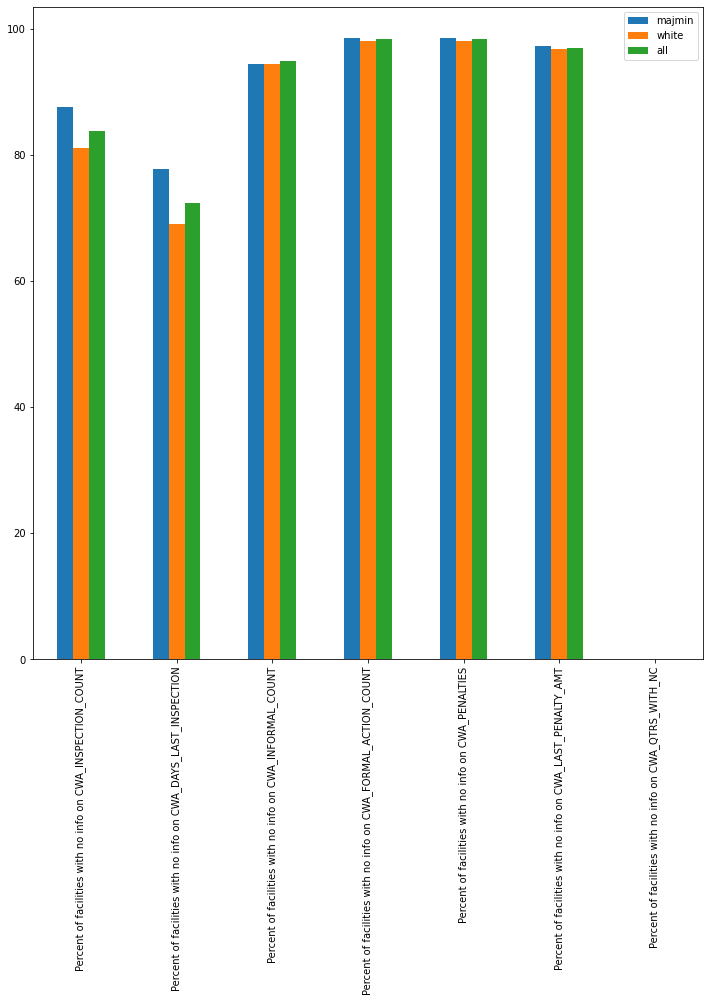

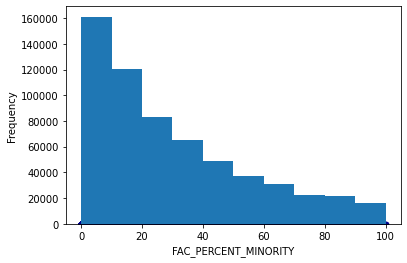

In [ ]:
results.drop("facilities").plot.bar(figsize=(12,12))
facs.plot.scatter(x="FAC_PERCENT_MINORITY", y="CWA_FORMAL_ACTION_COUNT", c='DarkBlue')
facs['FAC_PERCENT_MINORITY'].plot.hist(bins=10)

In [ ]:
states = geopandas.read_file("https://raw.githubusercontent.com/edgi-govdata-archiving/ECHO-Geo/main/cb_2018_us_state_500k.json")
states.crs = "EPSG:4326"
states

,id,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,dvote,percent,geometry
0,None,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,485131.0,40.0,"POLYGON ((-91.16551 33.00519, -91.12239 33.060..."
1,None,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,2189316.0,46.0,"MULTIPOLYGON (((-75.75435 35.18881, -75.52079 ..."
2,None,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,420375.0,29.0,"POLYGON ((-103.00146 37.00012, -102.04208 36.9..."
3,None,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,1981473.0,50.0,"MULTIPOLYGON (((-75.64655 37.96630, -75.24052 ..."
4,None,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,188794.0,26.0,"POLYGON ((-82.59218 38.42084, -82.32987 38.443..."
5,None,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,780154.0,38.0,"MULTIPOLYGON (((-89.34377 30.05868, -89.18567 ..."
6,None,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,2268839.0,47.0,"MULTIPOLYGON (((-83.88213 45.97443, -83.68450 ..."
7,None,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,1995196.0,59.0,"MULTIPOLYGON (((-70.23522 41.28513, -70.06275 ..."
8,None,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,189765.0,27.0,"POLYGON ((-116.91426 45.99498, -117.06158 46.3..."
9,None,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,4504975.0,48.0,"MULTIPOLYGON (((-81.81605 24.56308, -81.44236 ..."


In [ ]:
#add column for counting NAs on X column (e.g. CWA_INSPECTION_COUNT)
def labeler (row):
  if math.isnan(row.CWA_INSPECTION_COUNT):
    return 1
  else:
    return 0
majmin["Count"] = majmin.apply(labeler, axis=1) #facs, white

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
state_data = majmin.groupby(["FAC_STATE"], dropna=False).agg({"Count": "sum", "FAC_STATE": "count"}) #facs, white
state_data["Percent"] = (state_data["Count"] / state_data["FAC_STATE"]) * 100
state_data["STUSPS"] = state_data.index

# remove "inf" values resulting from no state listed
state_data = state_data.drop(state_data[state_data["Percent"]>100].index)

std = state_data['Percent'].std()
mean = state_data['Percent'].mean()
def stder(row):
  v = (row["Percent"]-mean) / std
  return v
state_data["STD"] = state_data.apply(stder, axis=1)# calculate departure from mean in terms of STD

display(state_data)

,Count,FAC_STATE,Percent,STUSPS,STD
FAC_STATE,,,,,
AK,401,519,77.263969,AK,0.027566
AL,4249,5948,71.435777,AL,-0.326892
AR,879,1141,77.037686,AR,0.013804
AZ,572,632,90.506329,AZ,0.832938
CA,11125,14388,77.321379,CA,0.031058
CO,2325,2653,87.636638,CO,0.658409
CT,207,297,69.696970,CT,-0.432642
DC,355,425,83.529412,DC,0.408617
DE,13,24,54.166667,DE,-1.377162


In [ ]:
import folium

map = folium.Map()  

m = folium.Choropleth(
  geo_data = states,
  name="choropleth",
  data=state_data,
  columns=["STUSPS","STD"],
  key_on="feature.properties.STUSPS",
  fill_color="PRGn",
  fill_opacity=0.7,
  line_opacity=0.2,
  #legend_name="Missing Data Rate (% of Facilities with No CWA Inspection Info)"
  legend_name="Departure from Average % of Facilities with No CWA Inspection Info"
).add_to(map)

bounds = m.get_bounds()
map.fit_bounds(bounds)
display(map)